In [1]:
## Import libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt
import statsmodels.api as sm

In [2]:
## load the dataset
df=pd.read_excel("AutoInsurance.xlsx")

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
df.describe(include="all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,2011-01-10 00:00:00,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [7]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


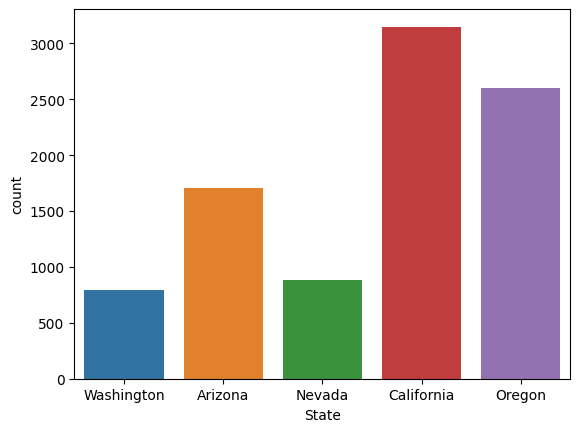

In [8]:
sns.countplot(x="State",data=df)
plt.show()

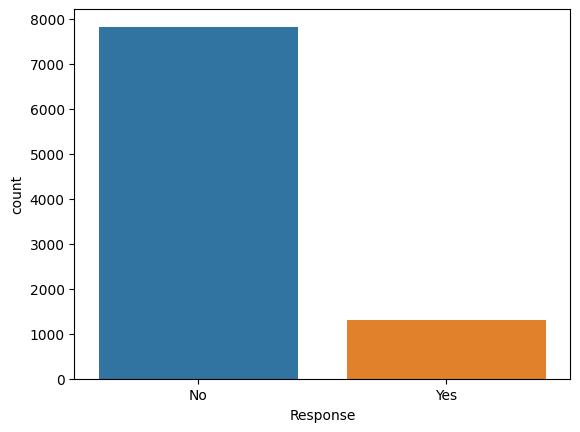

In [9]:
sns.countplot(x="Response",data=df)
plt.show()

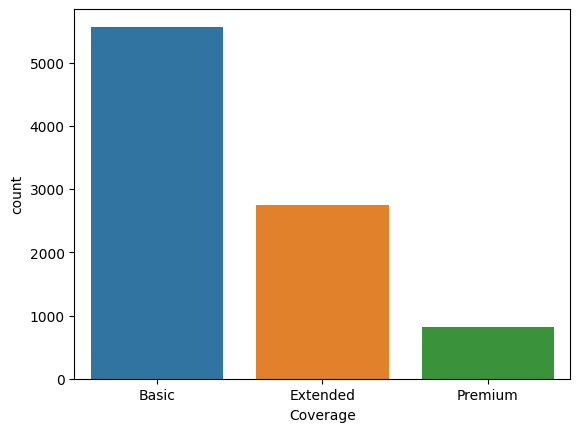

In [10]:
sns.countplot(x="Coverage",data=df)
plt.show()

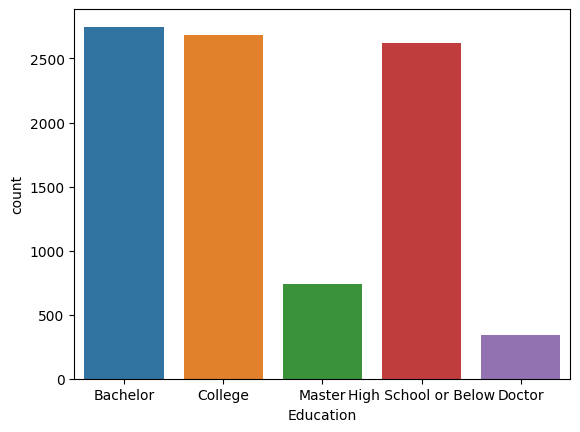

In [11]:
sns.countplot(x="Education",data=df)
plt.show()

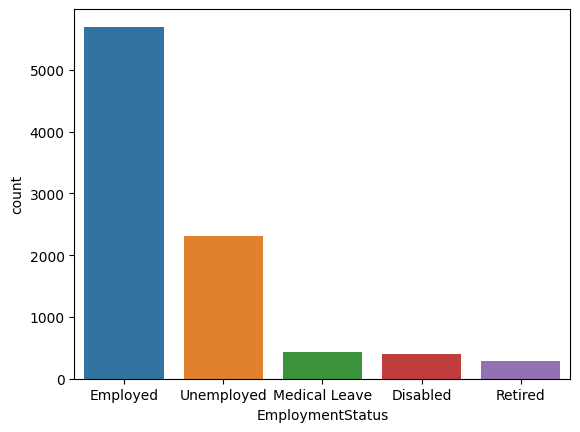

In [12]:
sns.countplot(x="EmploymentStatus",data=df)
plt.show()

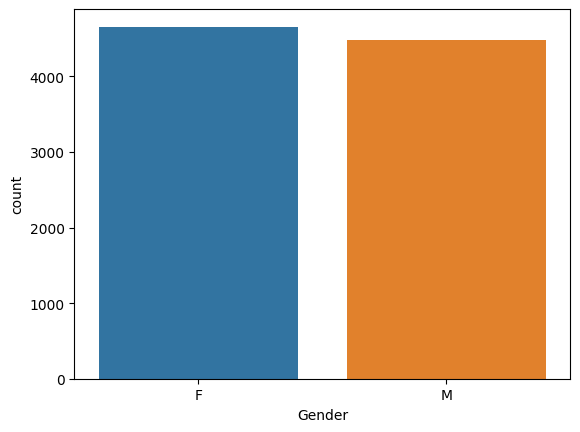

In [13]:
sns.countplot(x="Gender",data=df)
plt.show()

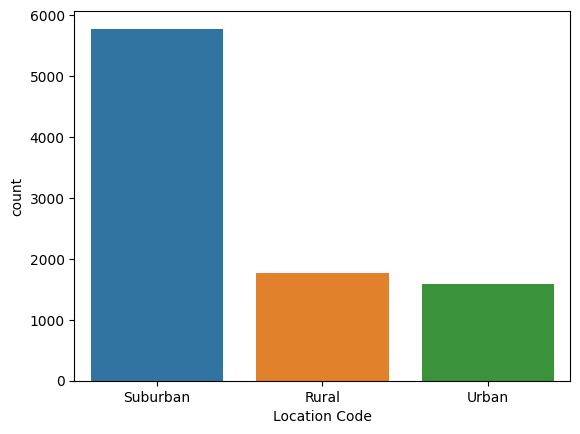

In [14]:
sns.countplot(x="Location Code",data=df)
plt.show()

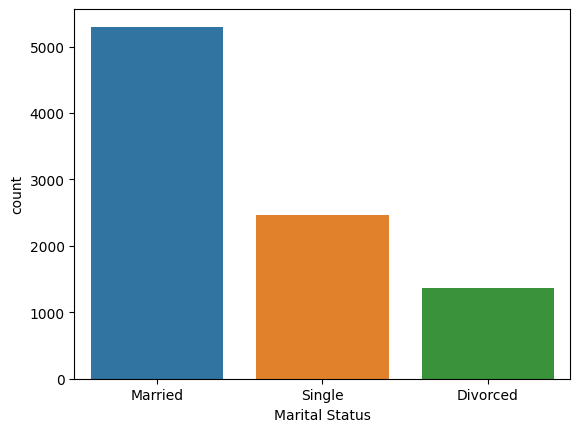

In [15]:
sns.countplot(x="Marital Status",data=df)
plt.show()

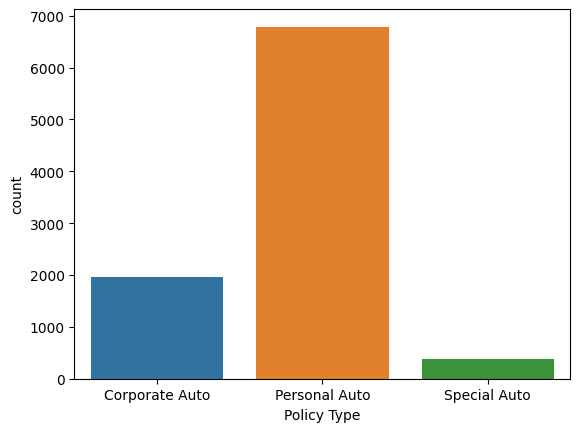

In [16]:
sns.countplot(x="Policy Type",data=df)
plt.show()

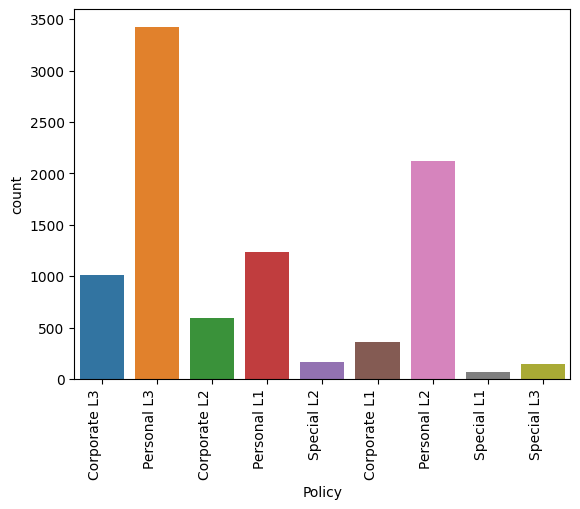

In [17]:
sns.countplot(x="Policy",data=df)
plt.xticks(rotation=90, ha="right")
plt.show()

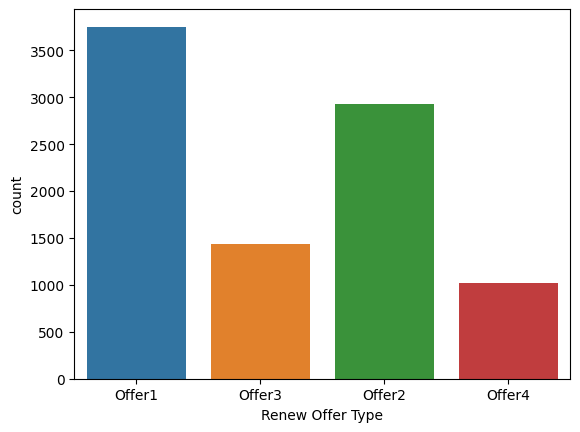

In [18]:
sns.countplot(x="Renew Offer Type",data=df)
plt.show()

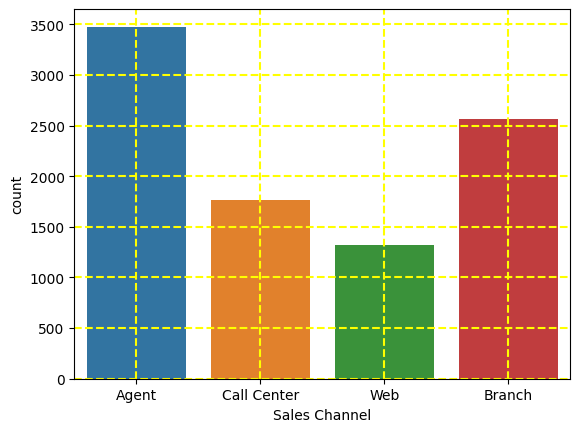

In [19]:
sns.countplot(x="Sales Channel",data=df)
plt.grid(color = 'yellow', linestyle = '--', linewidth = 1.5)
plt.show()

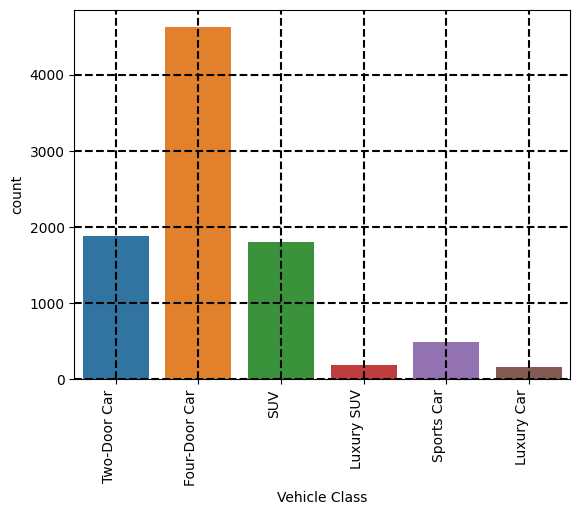

In [20]:
sns.countplot(x="Vehicle Class",data=df)
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.xticks(rotation=90, ha="right")
plt.show()

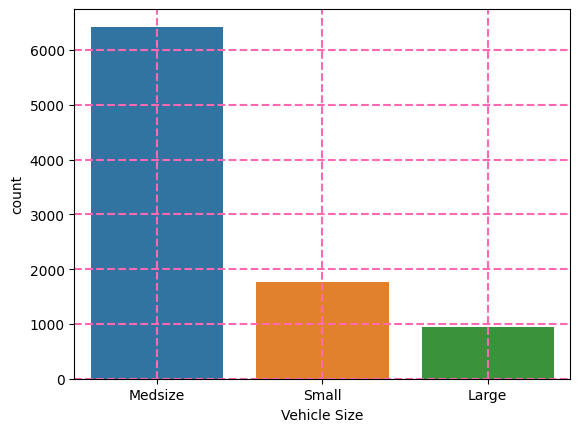

In [21]:
sns.countplot(x="Vehicle Size",data=df)
plt.grid(color = 'hotpink', linestyle = '--', linewidth = 1.5)
plt.show()

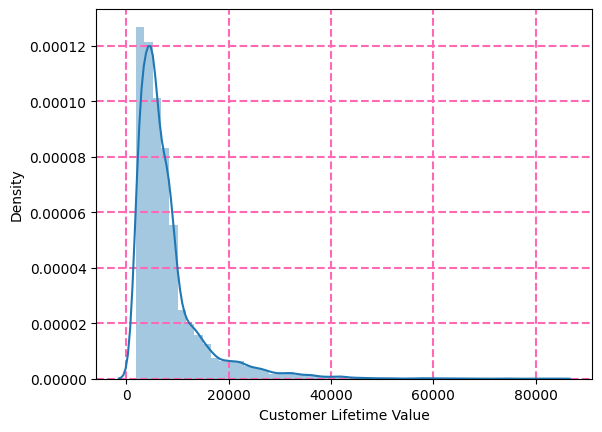

In [22]:
sns.distplot(df["Customer Lifetime Value"])
plt.grid(color = 'hotpink', linestyle = '--', linewidth = 1.5)
plt.show()

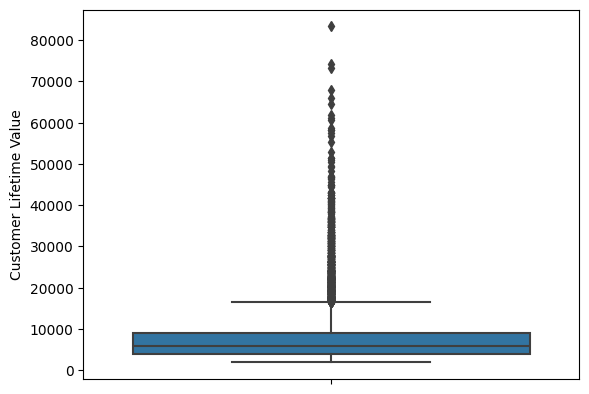

In [23]:
sns.boxplot(y="Customer Lifetime Value", data=df)
plt.show()

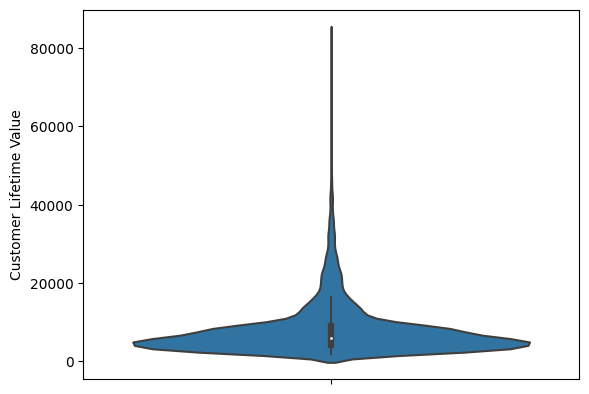

In [24]:
sns.violinplot(y="Customer Lifetime Value", data=df)
plt.show()

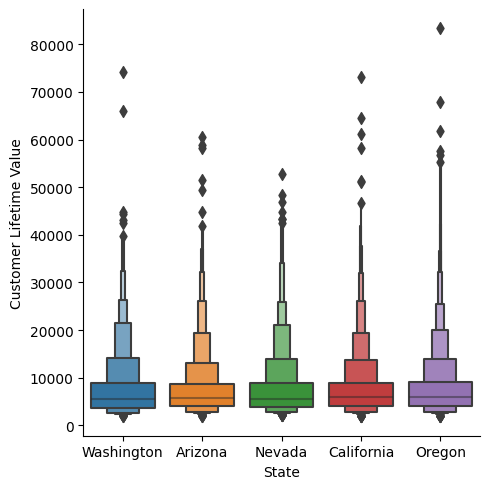

In [25]:
sns.catplot(data=df,
    x="State", y="Customer Lifetime Value", kind="boxen",
)

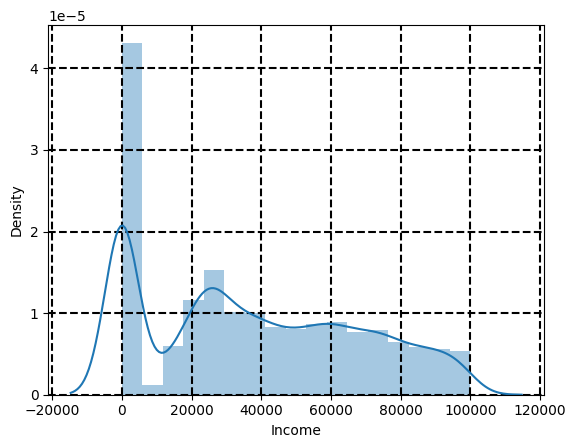

In [26]:
sns.distplot(df["Income"])
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.show()

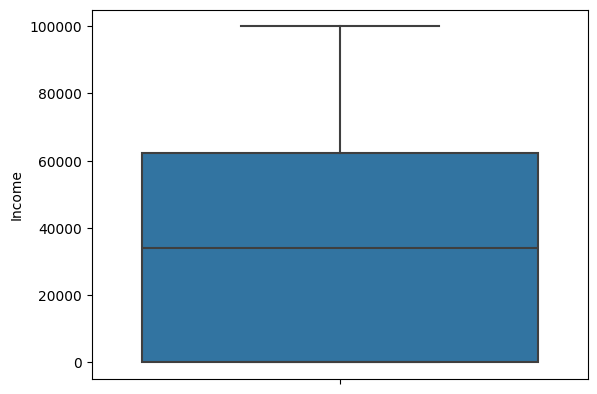

In [27]:
sns.boxplot(y="Income", data=df)
plt.show()

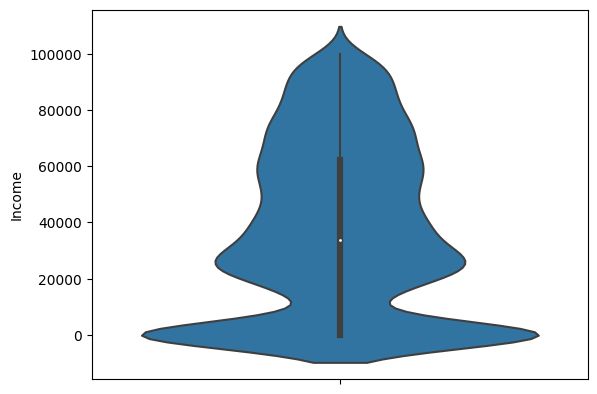

In [28]:
sns.violinplot(y="Income", data=df)
plt.show()

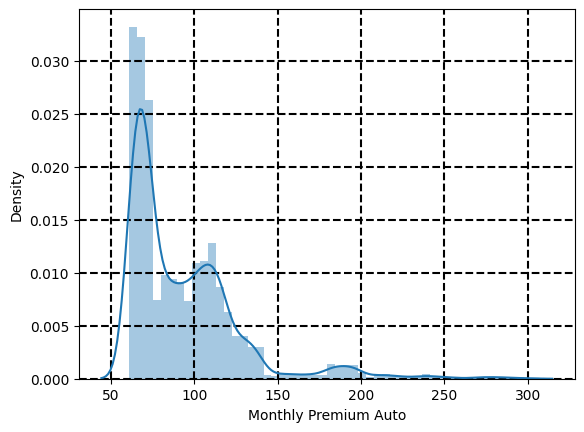

In [29]:
sns.distplot(df["Monthly Premium Auto"])
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.show()

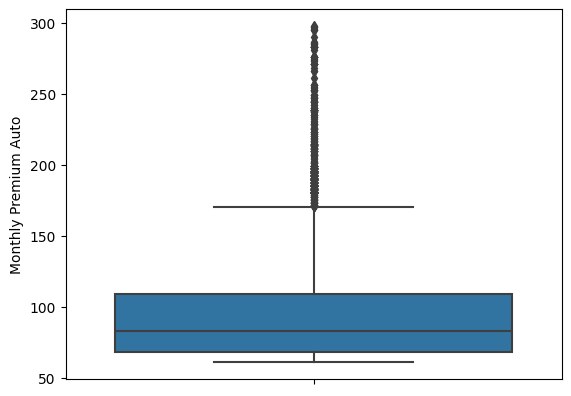

In [30]:
sns.boxplot(y="Monthly Premium Auto", data=df)
plt.show()

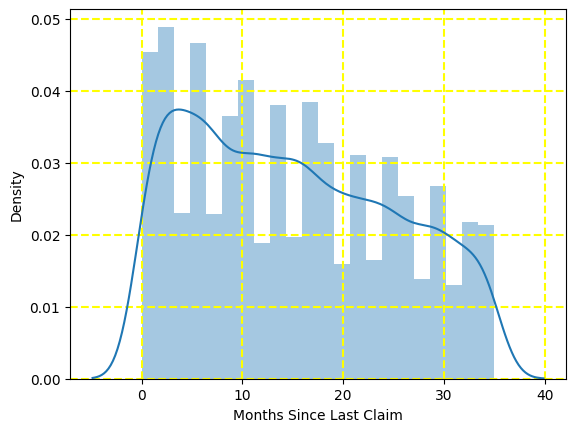

In [31]:
sns.distplot(df["Months Since Last Claim"])
plt.grid(color = 'yellow', linestyle = '--', linewidth = 1.5)
plt.show()

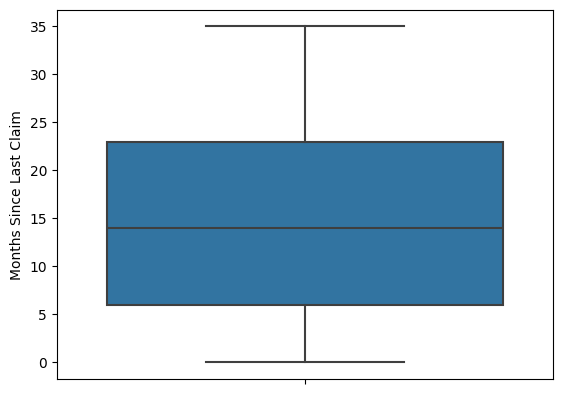

In [32]:
sns.boxplot(y="Months Since Last Claim", data=df)
plt.show()

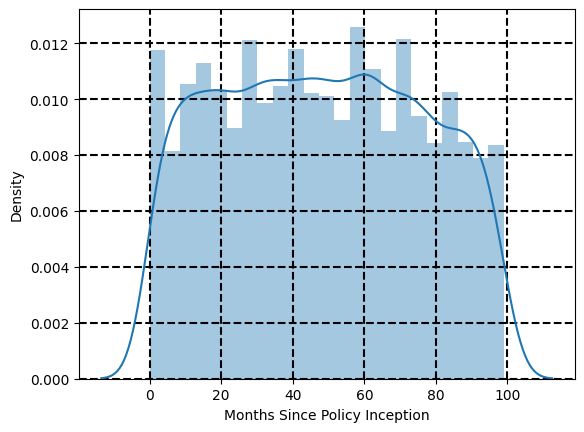

In [33]:
sns.distplot(df["Months Since Policy Inception"])
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.show()

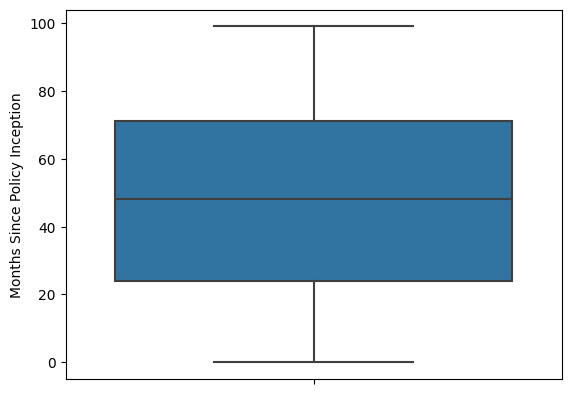

In [34]:
sns.boxplot(y="Months Since Policy Inception", data=df)
plt.show()

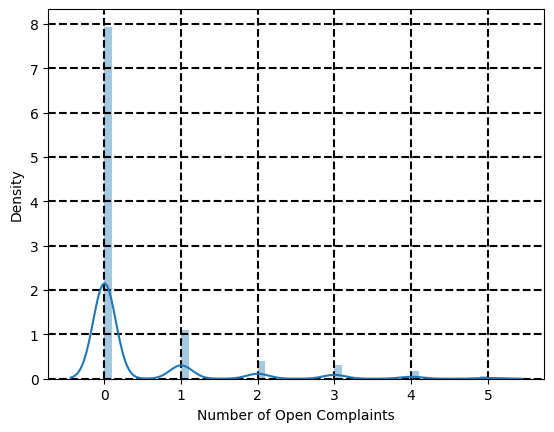

In [35]:
sns.distplot(df["Number of Open Complaints"])
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.show()

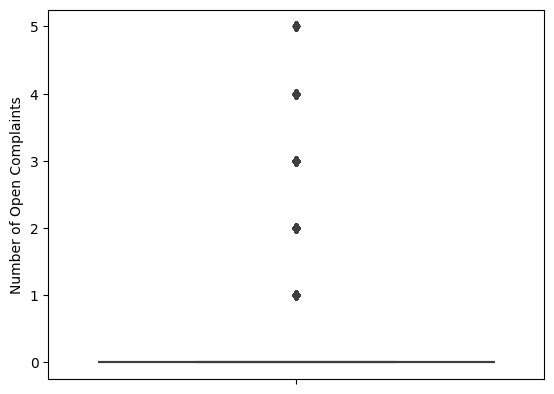

In [36]:
sns.boxplot(y="Number of Open Complaints", data=df)
plt.show()

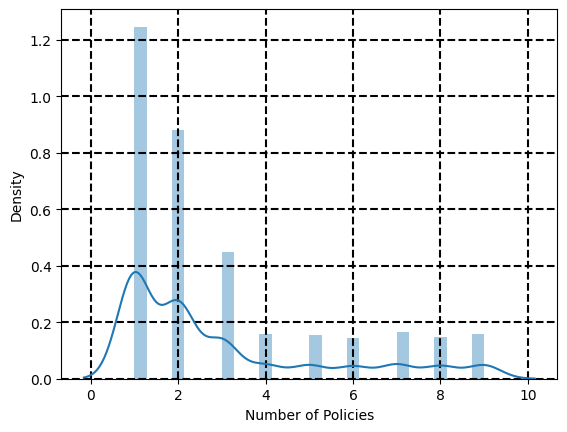

In [37]:
sns.distplot(df["Number of Policies"])
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.show()

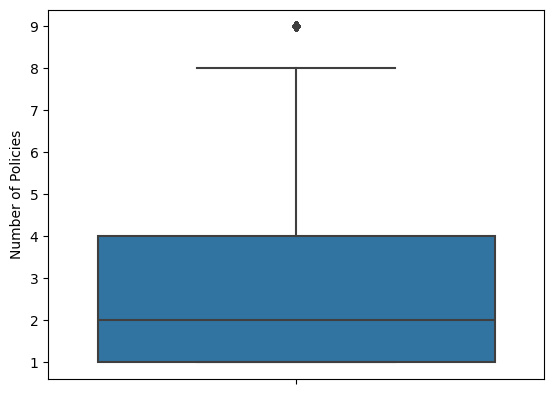

In [38]:
sns.boxplot(y="Number of Policies", data=df)
plt.show()

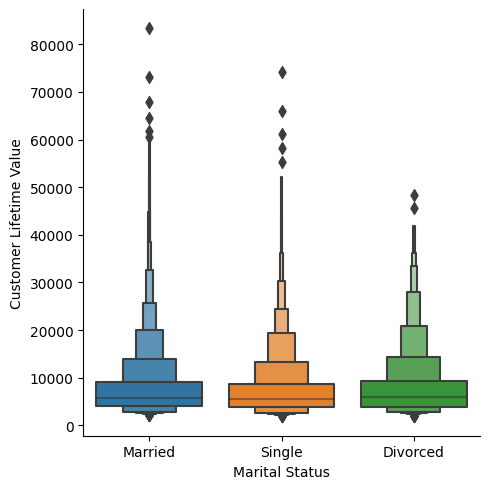

In [39]:
sns.catplot(data=df,
    x="Marital Status", y="Customer Lifetime Value", kind="boxen",
)

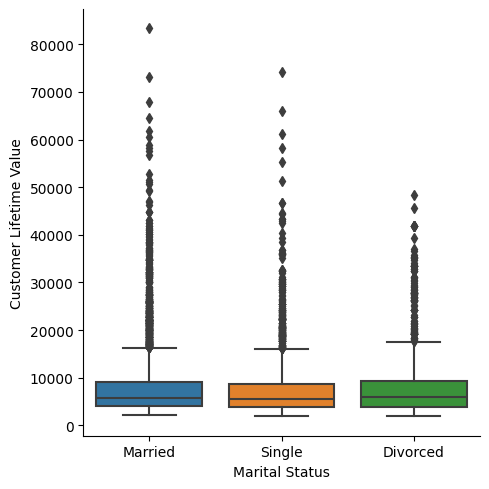

In [40]:
sns.catplot(data=df,
    x="Marital Status", y="Customer Lifetime Value", kind="box",
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Employed'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Medical Leave'),
  Text(3, 0, 'Disabled'),
  Text(4, 0, 'Retired')])

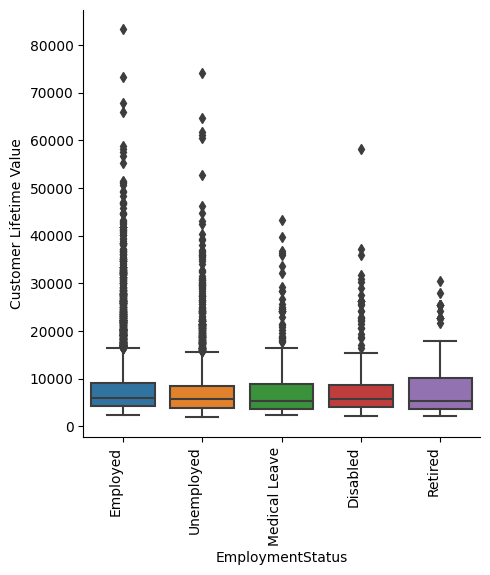

In [41]:
sns.catplot(data=df,
    x="EmploymentStatus", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


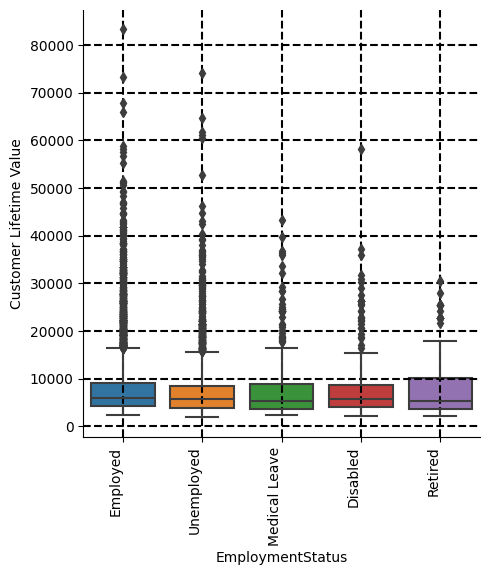

In [42]:
sns.catplot(data=df,
    x="EmploymentStatus", y="Customer Lifetime Value", kind="box",
)
plt.grid(color = 'black', linestyle = '--', linewidth = 1.5)
plt.xticks(rotation=90, ha="right")
plt.show()

Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   int64  
 13  Months Since Last Claim        9134 non-null   int64  
 14  Months Since Policy Inception  9134 non-null   int64  
 15  Number of Open Complaints      9134 non-null   int64  
 16  Number of Policies             9134 non-null   int64  
 17  Policy Type                    9134 non-null   object 
 18  Policy                         9134 non-null   object 
 19  Renew Offer Type               9134 non-null   object 
 20  Sales Channel                  9134 non-null   object 
 21  Total Claim Amount             9134 non-null   float64
 22  Vehicle Class                  9134 non-null   object 
 23  Vehicle Size                   9134 non-null   object 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Washington'),
  Text(1, 0, 'Arizona'),
  Text(2, 0, 'Nevada'),
  Text(3, 0, 'California'),
  Text(4, 0, 'Oregon')])

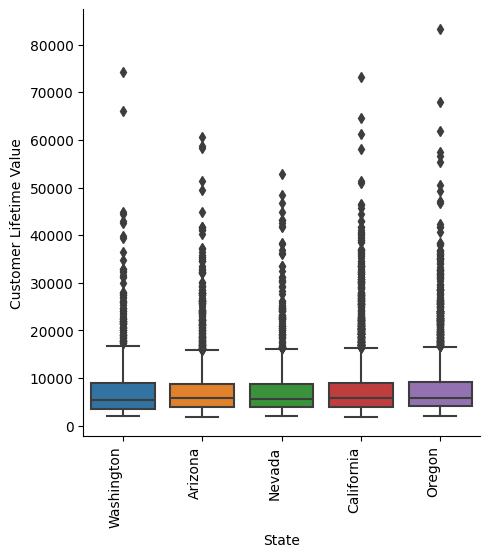

In [43]:
sns.catplot(data=df,
    x="State", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

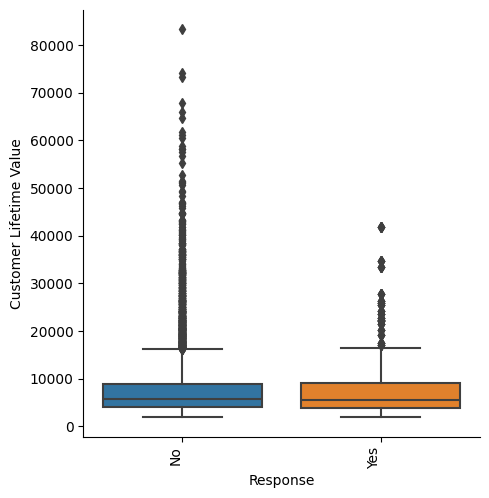

In [44]:
sns.catplot(data=df,
    x="Response", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Basic'), Text(1, 0, 'Extended'), Text(2, 0, 'Premium')])

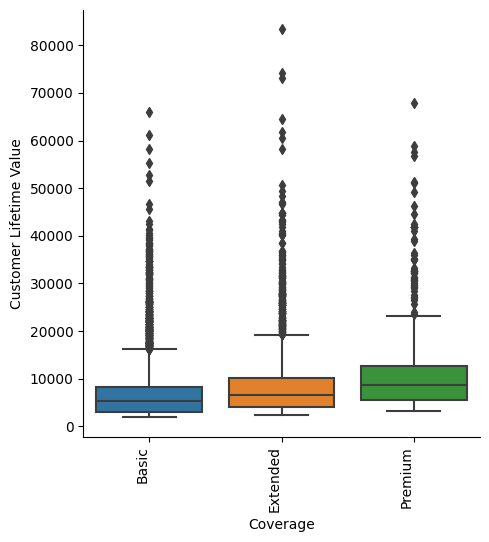

In [45]:
sns.catplot(data=df,
    x="Coverage", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'High School or Below'),
  Text(4, 0, 'Doctor')])

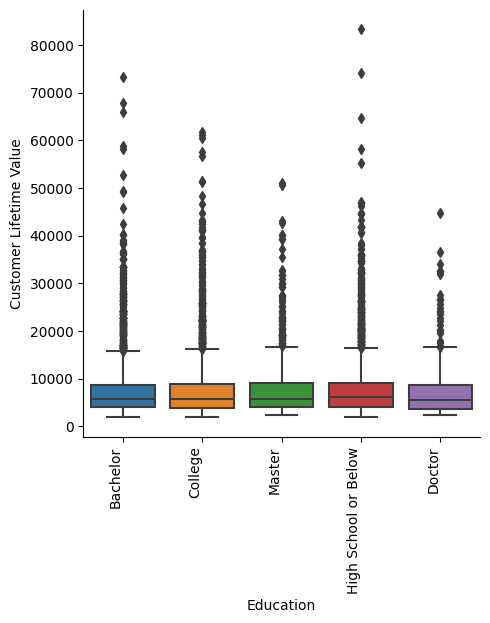

In [46]:
sns.catplot(data=df,
    x="Education", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

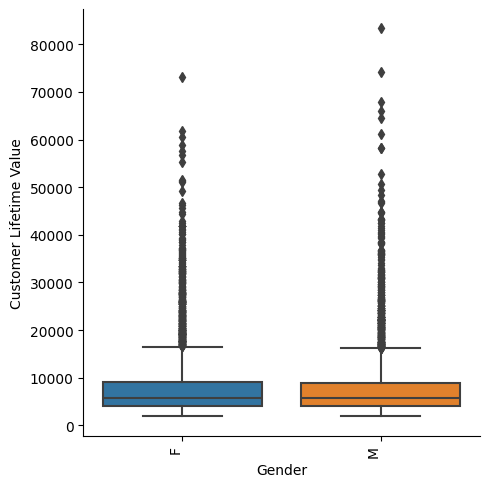

In [47]:
sns.catplot(data=df,
    x="Gender", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Suburban'), Text(1, 0, 'Rural'), Text(2, 0, 'Urban')])

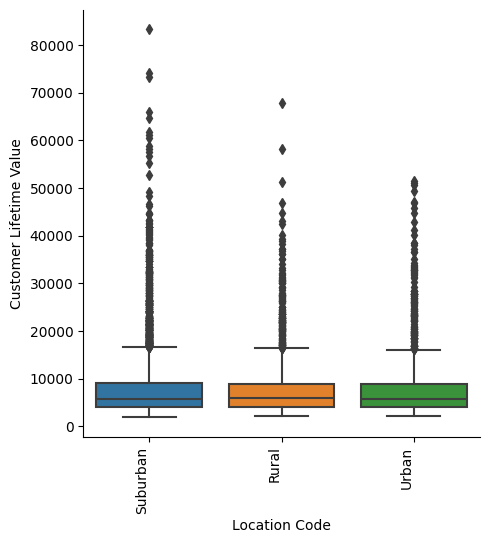

In [48]:
sns.catplot(data=df,
    x="Location Code", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Corporate Auto'),
  Text(1, 0, 'Personal Auto'),
  Text(2, 0, 'Special Auto')])

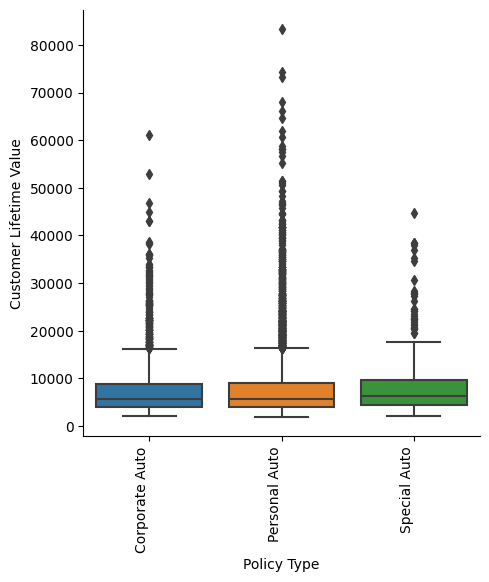

In [49]:
sns.catplot(data=df,
    x="Policy Type", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Corporate L3'),
  Text(1, 0, 'Personal L3'),
  Text(2, 0, 'Corporate L2'),
  Text(3, 0, 'Personal L1'),
  Text(4, 0, 'Special L2'),
  Text(5, 0, 'Corporate L1'),
  Text(6, 0, 'Personal L2'),
  Text(7, 0, 'Special L1'),
  Text(8, 0, 'Special L3')])

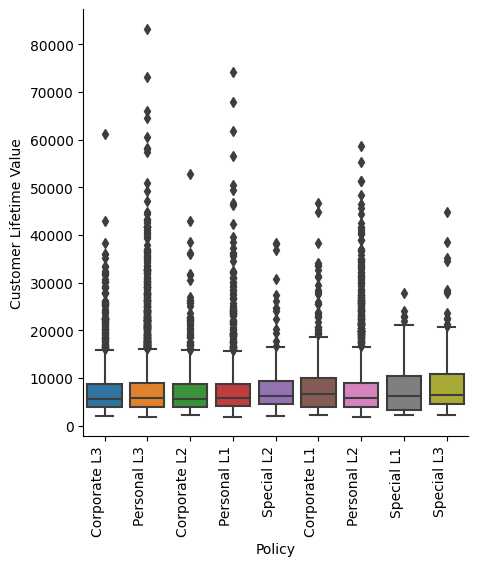

In [50]:
sns.catplot(data=df,
    x="Policy", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Offer1'),
  Text(1, 0, 'Offer3'),
  Text(2, 0, 'Offer2'),
  Text(3, 0, 'Offer4')])

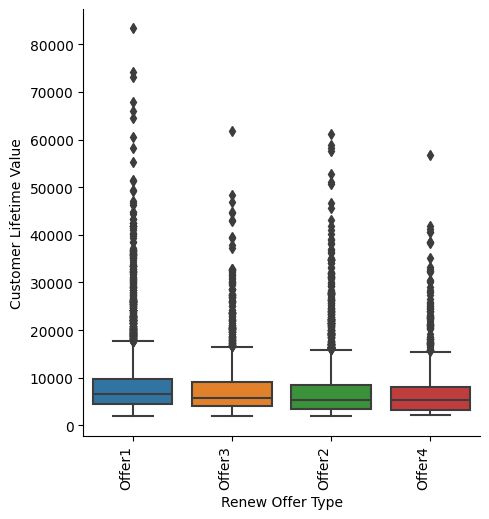

In [51]:
sns.catplot(data=df,
    x="Renew Offer Type", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agent'),
  Text(1, 0, 'Call Center'),
  Text(2, 0, 'Web'),
  Text(3, 0, 'Branch')])

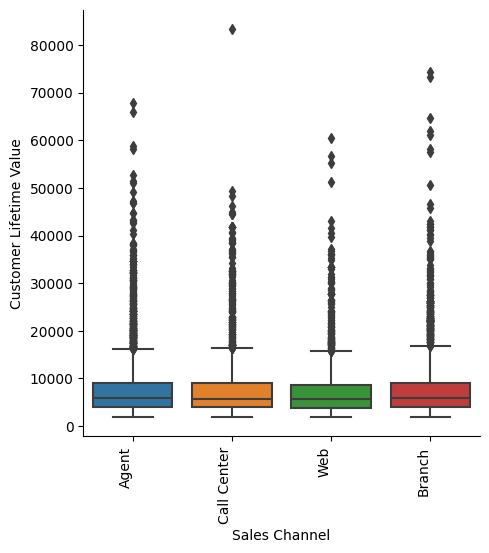

In [52]:
sns.catplot(data=df,
    x="Sales Channel", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Two-Door Car'),
  Text(1, 0, 'Four-Door Car'),
  Text(2, 0, 'SUV'),
  Text(3, 0, 'Luxury SUV'),
  Text(4, 0, 'Sports Car'),
  Text(5, 0, 'Luxury Car')])

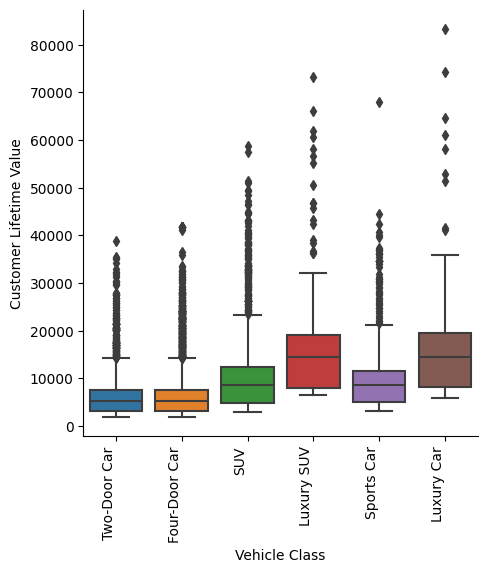

In [53]:
sns.catplot(data=df,
    x="Vehicle Class", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


(array([0, 1, 2]),
 [Text(0, 0, 'Medsize'), Text(1, 0, 'Small'), Text(2, 0, 'Large')])

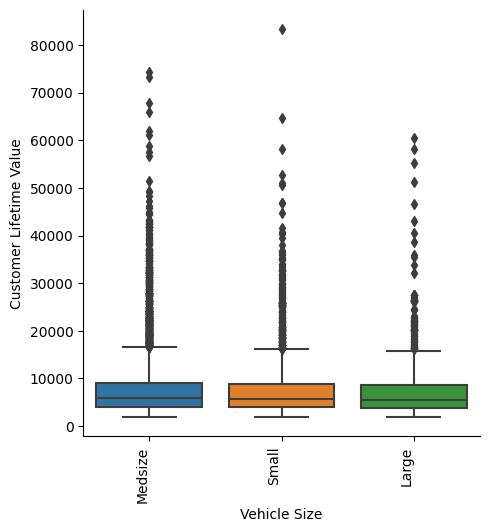

In [54]:
sns.catplot(data=df,
    x="Vehicle Size", y="Customer Lifetime Value", kind="box",
)
plt.xticks(rotation=90, ha="right")


In [55]:
df=df.drop(columns=["Customer","Effective To Date"],axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [57]:
df2=pd.get_dummies(df,columns=["State","Response","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"])

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Income                          9134 non-null   int64  
 2   Monthly Premium Auto            9134 non-null   int64  
 3   Months Since Last Claim         9134 non-null   int64  
 4   Months Since Policy Inception   9134 non-null   int64  
 5   Number of Open Complaints       9134 non-null   int64  
 6   Number of Policies              9134 non-null   int64  
 7   Total Claim Amount              9134 non-null   float64
 8   State_Arizona                   9134 non-null   bool   
 9   State_California                9134 non-null   bool   
 10  State_Nevada                    9134 non-null   bool   
 11  State_Oregon                    9134 non-null   bool   
 12  State_Washington                91

# SPLIT DATA

In [59]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [60]:
# lets build our linear model
# independant variables
x = df2.drop(['Customer Lifetime Value'], axis=1)
# the dependent variable
y = df2[['Customer Lifetime Value']]

In [61]:
# Split x and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=0)

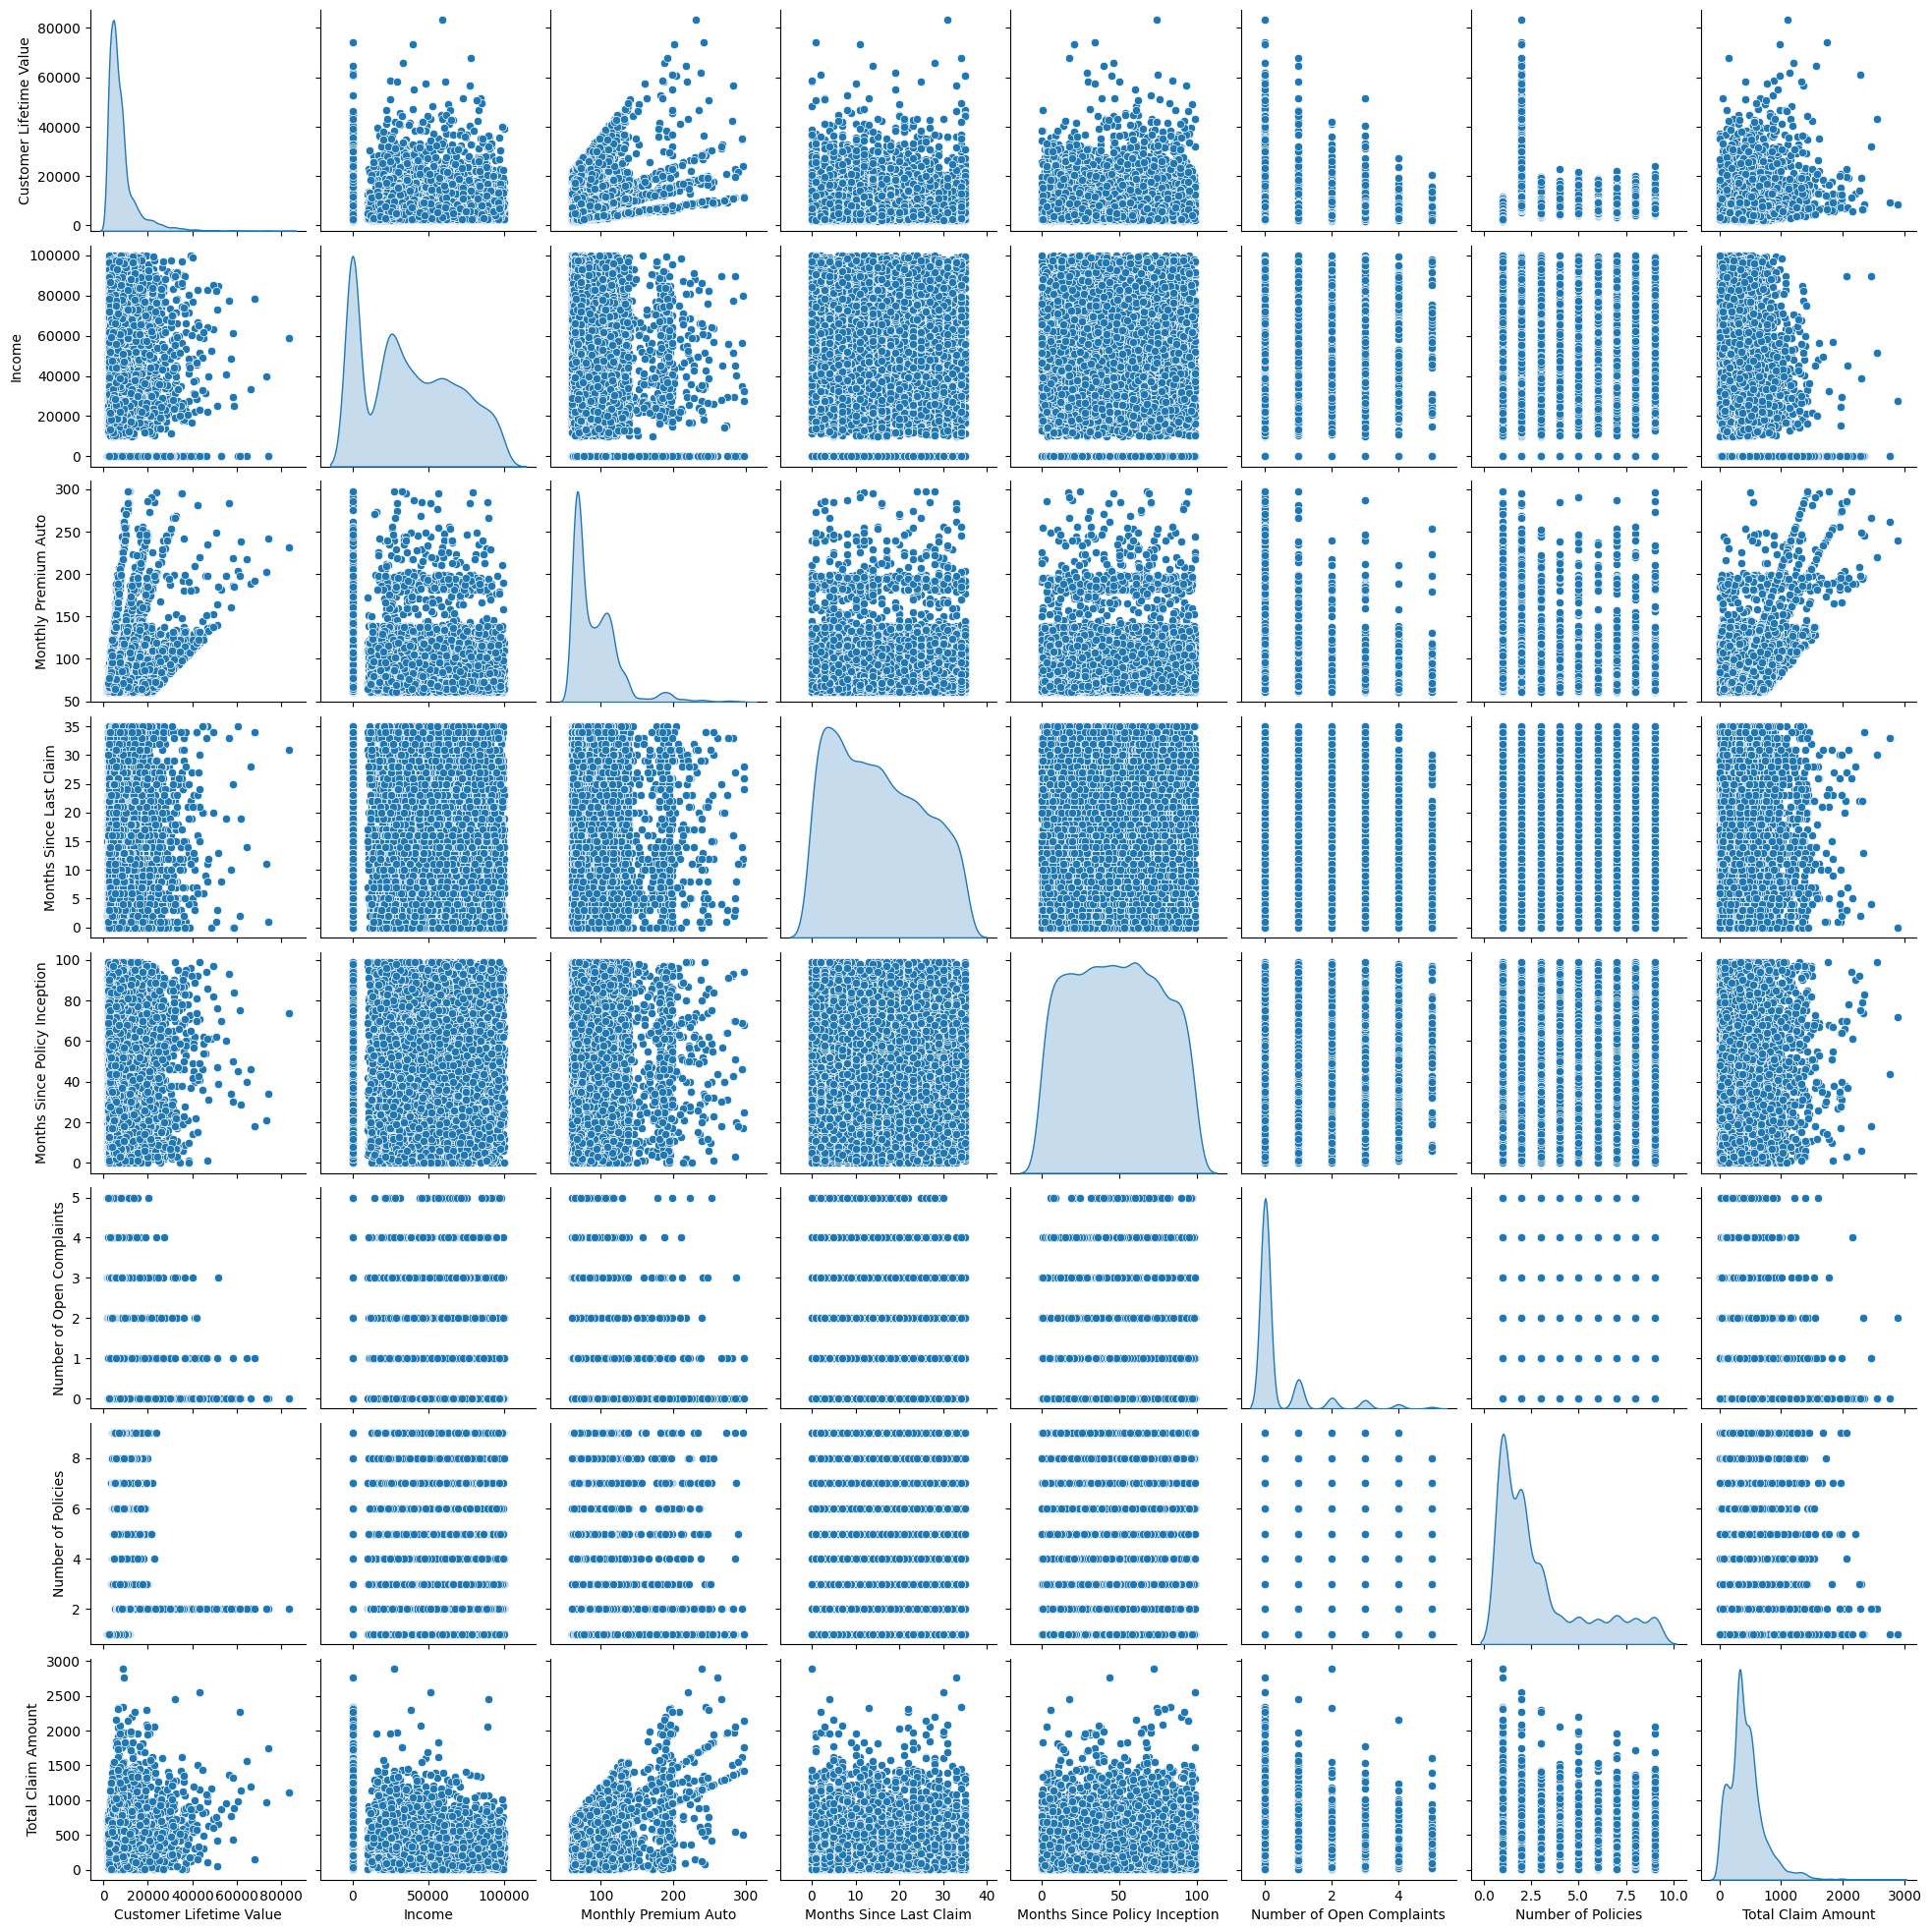

In [62]:
sns.pairplot(df,diag_kind="kde")

# Mann-Whitney U test

In [63]:
mannwhitneyu(df2['Response_No'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [64]:
mannwhitneyu(df2['Response_Yes'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [65]:
mannwhitneyu(df2['EmploymentStatus_Employed'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [66]:
mannwhitneyu(df2['Location Code_Rural'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [67]:
mannwhitneyu(df2['Policy Type_Corporate Auto'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [68]:
mannwhitneyu(df2['Policy_Corporate L3'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [69]:
mannwhitneyu(df2['Policy_Special L3'], df2['Customer Lifetime Value'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [70]:
from pingouin import mwu
mwu(df2['Policy_Special L3'], df2['Customer Lifetime Value'])

,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.0,1.0,0.0


In [71]:
mwu(df2['Sales Channel_Agent'], df2['Customer Lifetime Value'])

,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.0,1.0,0.0


In [72]:
mwu(df2['Vehicle Size_Large'], df2['Customer Lifetime Value'])

,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.0,1.0,0.0


# Kruskal Wallis test

In [73]:
mystate=df["State"]
myresponse=df["Response"]
mycoverage=df["Coverage"]
myeducation=df["Education"]
myemploymentstatus=df["EmploymentStatus"]
mygender=df["Gender"]
mylocationcode=df["Location Code"]
mymaritalstatus=df["Marital Status"]
mypolicytype=df["Policy Type"]
mypolicy=df["Policy"]
myrenewoffertype=df["Renew Offer Type"]
mysaleschannel=df["Sales Channel"]
myvehicleclass=df["Vehicle Class"]
myvehiclesize=df["Vehicle Size"]

In [74]:
myCrosstable=pd.crosstab(mystate,myresponse)
myCrosstable

Response,No,Yes
State,,
Arizona,1460,243
California,2694,456
Nevada,758,124
Oregon,2225,376
Washington,689,109


In [75]:
kruskal(mystate,myresponse)

KruskalResult(statistic=1972.131590047541, pvalue=0.0)

In [76]:
myCrosstable2=pd.crosstab(myresponse,mycoverage)
myCrosstable2

Coverage,Basic,Extended,Premium
Response,,,
No,4770,2352,704
Yes,798,390,120


In [77]:
kruskal(myresponse,mycoverage)

KruskalResult(statistic=11011.731386365529, pvalue=0.0)

In [78]:
myCrosstable3=pd.crosstab(myemploymentstatus,myeducation)
myCrosstable3

Education,Bachelor,College,Doctor,High School or Below,Master
EmploymentStatus,,,,,
Disabled,121,98,22,118,46
Employed,1702,1664,249,1528,555
Medical Leave,126,145,17,115,29
Retired,88,102,1,72,19
Unemployed,711,672,53,789,92


In [79]:
kruskal(myemploymentstatus,myeducation)

KruskalResult(statistic=3642.2758854130657, pvalue=0.0)

# Model Building

In [80]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

LinearRegression()

In [81]:
model_1.score(x_train, y_train)

0.18022530782421198

In [82]:
model_1.score(x_test, y_test)

0.1310800671770601

In [83]:
# fit to a simple linear model

In [84]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model_1.coef_[0][idx]))

The coefficient for Income is -0.0023642265447824523
The coefficient for Monthly Premium Auto is 60.49919835815748
The coefficient for Months Since Last Claim is 5.078544972654882
The coefficient for Months Since Policy Inception is -1.3578794168717536
The coefficient for Number of Open Complaints is -245.91021869975083
The coefficient for Number of Policies is 46.32104673874372
The coefficient for Total Claim Amount is 0.17787822451225566
The coefficient for State_Arizona is -69.42522106826328
The coefficient for State_California is 105.8814240739495
The coefficient for State_Nevada is -148.9556071983949
The coefficient for State_Oregon is 27.54483056688001
The coefficient for State_Washington is 84.95457362560717
The coefficient for Response_No is 262.60899589732196
The coefficient for Response_Yes is -262.60899589736425
The coefficient for Coverage_Basic is -238.76137317507005
The coefficient for Coverage_Extended is 31.72377208998853
The coefficient for Coverage_Premium is 207.0376

In [85]:
intercept = model_1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3141.285454755194


In [86]:
mse=cross_val_score(model_1,x,y,scoring="neg_mean_squared_error",cv=5)

In [87]:
mean_mse=np.mean(mse)
print(mean_mse)

-39930860.036518805


In [88]:
y_pred=model_1.predict(x_test)

In [89]:
print(sqrt(mean_squared_error(y_test,y_pred)))

6157.898533877751


# Ridge and Lasso Regression

# Create a regularized RIDGE model and note the coefficients


In [90]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[-2.36292782e-03  6.09076256e+01  5.07263209e+00 -1.35716617e+00
  -2.45945835e+02  4.63098335e+01  1.78168422e-01 -6.93056243e+01
   1.05827879e+02 -1.48833029e+02  2.74085916e+01  8.49021825e+01
   2.62510590e+02 -2.62510590e+02 -2.29338362e+02  3.27491937e+01
   1.96589169e+02  2.16630123e+01 -3.61621840e+00 -2.29621871e+02
   3.97095824e+02 -1.85520748e+02 -3.31298625e+02  3.53239828e+02
   9.49397601e+01  2.15809717e+02 -3.32690680e+02  5.02173500e+01
  -5.02173500e+01  2.31904207e+01 -2.77131000e+02  2.53940579e+02
  -2.33045128e+01  1.56315380e+02 -1.33010867e+02 -1.61153229e+02
  -1.04860009e+02  2.66013238e+02  5.36401892e+02 -4.37089078e+02
  -2.60466044e+02 -1.06949185e+02  2.98825040e+01 -2.77933277e+01
  -3.02263245e+02 -3.56862429e+02  9.25138913e+02  5.45528127e+02
  -1.98169059e+02  1.67921059e+01 -3.64151174e+02 -5.08320267e+01
   4.52603887e+01  1.26966663e+02 -1.21395025e+02 -1.50260302e+03
   1.56361486e+03  1.43023094e+03 -1.75202748e+02 -1.00659959e+

# Create a regularized LASSO model and note the coefficients

In [91]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-2.34964001e-03  6.11927627e+01  5.06460504e+00 -1.35491569e+00
 -2.45839951e+02  4.62801540e+01  1.77417414e-01 -9.59612887e+01
  7.82352970e+01 -1.75150038e+02  0.00000000e+00  5.64756990e+01
  5.24082884e+02 -4.59585774e-13 -2.56165124e+02 -0.00000000e+00
  1.54974873e+02  2.48600890e+01 -0.00000000e+00 -2.24238451e+02
  4.00270409e+02 -1.80836913e+02 -4.24011014e+02  2.57891791e+02
  0.00000000e+00  1.17654913e+02 -4.26912454e+02  9.98879323e+01
 -0.00000000e+00 -0.00000000e+00 -2.99656952e+02  2.30357834e+02
  0.00000000e+00  1.79581884e+02 -1.09134880e+02 -2.12437493e+02
  0.00000000e+00  8.18817350e+01  7.18362527e+02 -2.51883755e+02
 -7.57877734e+01 -7.84994177e+01  5.73235584e+01  0.00000000e+00
  0.00000000e+00 -3.45199546e+01  1.23845772e+03  7.19010989e+02
 -2.42342634e+01  1.90027228e+02 -1.89538958e+02 -6.70597675e+01
  2.83547204e+01  1.09653684e+02 -1.37196719e+02 -1.31569140e+03
  1.71183793e+03  1.57806913e+03 -0.00000000e+00  7.14450128e+01
 -1.02842660

# Let us compare their scores

In [92]:
print(model_1.score(x_train, y_train))
print(model_1.score(x_test, y_test))


0.18022530782421198
0.1310800671770601


In [93]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.18022513680888286
0.1311216460961846


In [94]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.18022471765577797
0.13114906070537335


# Polynomial Regression

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_model2 = linear_model.LinearRegression()

poly_model2.fit(x_train2, y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_model2.score(x_train2, y_train))

0.37427256824403354


In [96]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_model2.score(x_test2, y_test))

-4.227226408544836


# Support Vector Regressor

In [97]:
from sklearn.svm import SVR

In [98]:
svr=SVR()
svr.fit(x_train, y_train) 
svr.score(x_test,y_test)

-0.10039101301165809

In [99]:
print("Support Vector Regressor Accuracy : {:.2f}%".format(svr.score(x_test,y_test)*100))

Support Vector Regressor Accuracy : -10.04%


In [100]:
svr1=SVR(
    kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [101]:
svr1.fit(x_train, y_train) 
svr1.score(x_test,y_test)

-0.0994232744813397

In [102]:
svr1.fit(x_train, y_train) 
print("SVR Accuracy with Auto : {:.2f}%".format(svr1.score(x_test,y_test)*100))

SVR Accuracy with Auto : -9.94%


In [103]:
y_pred1=svr.predict(x_test)

In [104]:
print(sqrt(mean_squared_error(y_test,y_pred1)))

6929.727643197682


In [105]:
# {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [106]:
svr2=SVR(
    kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [107]:
#svr2.fit(x_train, y_train) 
#svr2.score(x_test,y_test)

In [108]:
#svr2.fit(x_train, y_train) 
#print("SVR Accuracy with Linear Kernel : {:.2f}%".format(svr2.score(x_test,y_test)*100))

# Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dtr=DecisionTreeRegressor(max_depth=6)

In [111]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [112]:
print("Decision Tree Regressor : {:.2f}%".format(dtr.score(x_test,y_test)*100))

Decision Tree Regressor : 66.50%


In [113]:
y_pred2=dtr.predict(x_test)

In [114]:
print(sqrt(mean_squared_error(y_test,y_pred2)))

3823.53363245901


[Text(0.5, 0.9285714285714286, 'x[5] <= 1.5\nsquared_error = 48727636.976\nsamples = 6393\nvalue = 8046.92'),
 Text(0.25, 0.7857142857142857, 'x[1] <= 124.5\nsquared_error = 1974859.521\nsamples = 2263\nvalue = 3580.027'),
 Text(0.125, 0.6428571428571429, 'x[1] <= 87.5\nsquared_error = 532494.138\nsamples = 1966\nvalue = 3163.816'),
 Text(0.0625, 0.5, 'x[1] <= 72.5\nsquared_error = 91206.936\nsamples = 1254\nvalue = 2684.768'),
 Text(0.03125, 0.35714285714285715, 'x[1] <= 67.5\nsquared_error = 38358.107\nsamples = 872\nvalue = 2542.577'),
 Text(0.015625, 0.21428571428571427, 'x[23] <= 0.5\nsquared_error = 24978.521\nsamples = 530\nvalue = 2446.996'),
 Text(0.0078125, 0.07142857142857142, 'squared_error = 17996.614\nsamples = 199\nvalue = 2296.35'),
 Text(0.0234375, 0.07142857142857142, 'squared_error = 7329.371\nsamples = 331\nvalue = 2537.566'),
 Text(0.046875, 0.21428571428571427, 'x[23] <= 0.5\nsquared_error = 22994.338\nsamples = 342\nvalue = 2690.7'),
 Text(0.0390625, 0.0714285714

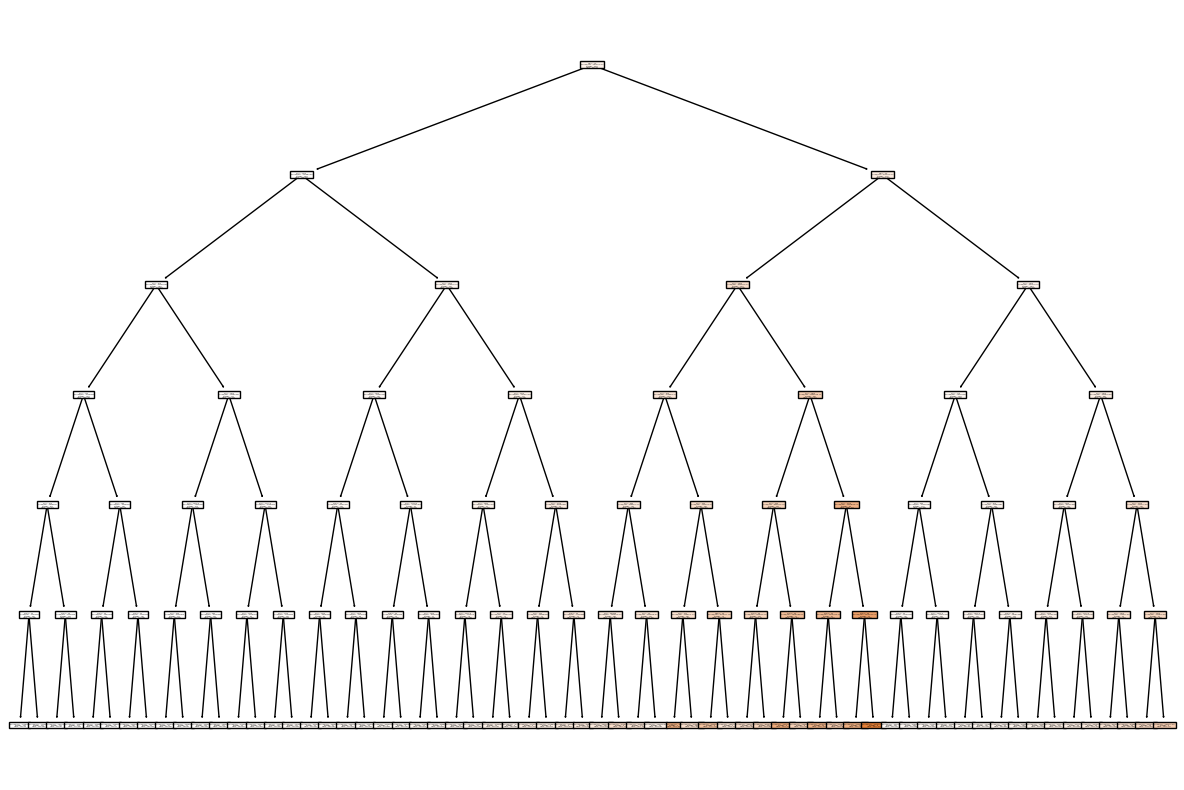

In [115]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtr,filled=True)

# Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rf=RandomForestRegressor(n_estimators=1000,random_state=1,max_depth=6)

In [118]:
rf.fit(x_train, y_train)
print("Random Forest Classifier : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Classifier : 69.10%


In [119]:
y_pred3=rf.predict(x_test)

In [120]:
print(sqrt(mean_squared_error(y_test,y_pred3)))

3672.021549849275


# Bagging

In [121]:
from sklearn.ensemble import BaggingRegressor

In [122]:
bgr=BaggingRegressor(n_estimators=23)

In [123]:
bgr.fit(x_train, y_train)

BaggingRegressor(n_estimators=23)

In [124]:
print(bgr.score(x_train,y_train))
print(bgr.score(x_test,y_test))

0.9526117651189917
0.6943711824879903


In [125]:
print("Bagging Regressor : {:.2f}%".format(bgr.score(x_test,y_test)*100))

Bagging Regressor : 69.44%


In [126]:
y_pred4=bgr.predict(x_test)

In [127]:
print(sqrt(mean_squared_error(y_test,y_pred4)))

3652.0759370670307


# XG-Boost

In [128]:
import xgboost

In [129]:
xgbr=xgboost.XGBRFRegressor()

In [130]:
xgbr.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [131]:
print(xgbr.score(x_train,y_train))
print(xgbr.score(x_test,y_test))

0.7420292816314888
0.6918607235876674


In [132]:
print("Boosting Regressor : {:.2f}%".format(xgbr.score(x_test,y_test)*100))

Boosting Regressor : 69.19%


Note: This model is suitable for this dataset

In [133]:
y_pred5=xgbr.predict(x_test)

In [134]:
print(sqrt(mean_squared_error(y_test,y_pred5)))

3667.0444797678724


# Adaboost

In [135]:
from sklearn.ensemble import AdaBoostRegressor

In [136]:
abr=AdaBoostRegressor()

In [137]:
abr.fit(x_train, y_train)

AdaBoostRegressor()

In [138]:
print(abr.score(x_train, y_train))
print(abr.score(x_test,y_test))

0.49762279231249185
0.4530829316785193


In [139]:
print("Adaboost Regressor : {:.2f}%".format(abr.score(x_test,y_test)*100))

Adaboost Regressor : 45.31%


In [140]:
y_pred6=abr.predict(x_test)

In [141]:
print(sqrt(mean_squared_error(y_test,y_pred6)))

4885.436662075302


# Gradient Boosting Regressor

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
gbr=GradientBoostingRegressor()

In [144]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [145]:
print(gbr.score(x_train, y_train))
print(gbr.score(x_test,y_test))

0.7388896218601886
0.6819750259796404


In [146]:
print("Gradient boost Regressor : {:.2f}%".format(gbr.score(x_test,y_test)*100))

Gradient boost Regressor : 68.20%


In [147]:
y_pred7=gbr.predict(x_test)

In [148]:
print(sqrt(mean_squared_error(y_test,y_pred7)))

3725.4030133430547


Note:- Only Gradient Boost Regressor Model will be suitable for this data

***********--------------****************------------------****************

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

# Data Transformation using label encoder(df)

In [152]:
##Data processing fns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [153]:
df["State"]=le.fit_transform(df["State"])

In [154]:
df["Response"]=le.fit_transform(df["Response"])

In [155]:
df["Coverage"]=le.fit_transform(df["Coverage"])

In [156]:
df["Education"]=le.fit_transform(df["Education"])

In [157]:
df["EmploymentStatus"]=le.fit_transform(df["EmploymentStatus"])

In [158]:
df["Location Code"]=le.fit_transform(df["Location Code"])

In [159]:
df["Marital Status"]=le.fit_transform(df["Marital Status"])

In [160]:
df["Policy Type"]=le.fit_transform(df["Policy Type"])

In [161]:
df["Policy"]=le.fit_transform(df["Policy"])

In [162]:
df["Renew Offer Type"]=le.fit_transform(df["Renew Offer Type"])

In [163]:
df["Sales Channel"]=le.fit_transform(df["Sales Channel"])

In [164]:
df["Vehicle Class"]=le.fit_transform(df["Vehicle Class"])

In [165]:
df["Vehicle Size"]=le.fit_transform(df["Vehicle Size"])

In [166]:
df["Gender"]=le.fit_transform(df["Gender"])

In [167]:
df.dtypes

State                              int32
Customer Lifetime Value          float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

In [168]:
# lets build our linear model
# independant variables
X = df.drop(['Customer Lifetime Value'], axis=1)
# the dependent variable
Y = df[['Customer Lifetime Value']]

In [169]:
# Split x and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=0)

In [170]:
# Data modelling with outliers and without outliers is also a good approach but here we are not looking into here

In [171]:
model_2 = LinearRegression()
model_2.fit(X_train, Y_train)

LinearRegression()

In [172]:
model_2.score(X_train, Y_train)

0.17578211591653015

In [173]:
model_2.score(X_test, Y_test)

0.13189609072533226

In [174]:
y_pred8=model_2.predict(X_test)

In [175]:
print(sqrt(mean_squared_error(Y_test,y_pred8)))

6155.006339586792


In [176]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_model2 = linear_model.LinearRegression()

poly_model2.fit(X_train2, Y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_model2.score(X_train2, Y_train))

0.22045664759733052


In [177]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_model2.score(X_test2, Y_test))

0.12162748128834089


In [178]:
from sklearn.svm import SVR

In [179]:
svr3=SVR()
svr3.fit(X_train, Y_train) 
svr3.score(X_test,Y_test)

-0.10039687863536528

In [180]:
print("Support Vector Regressor Accuracy : {:.2f}%".format(svr3.score(X_test,Y_test)*100))

Support Vector Regressor Accuracy : -10.04%


In [181]:
svr4=SVR(
    kernel='rbf',
    degree=3,
    gamma='auto',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [182]:
svr4.fit(X_train, Y_train) 
svr4.score(X_test,Y_test)

-0.09944980640198375

In [183]:
svr4.fit(X_train, Y_train) 
print("SVR Accuracy with Auto : {:.2f}%".format(svr4.score(X_test,Y_test)*100))

SVR Accuracy with Auto : -9.94%


In [184]:
y_pred9=svr4.predict(X_test)

In [185]:
print(sqrt(mean_squared_error(Y_test,y_pred9)))

6926.763378370393


In [186]:
# {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [187]:
svr2=SVR(
    kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

In [188]:
#svr2.fit(x_train, y_train) 
#svr2.score(x_test,y_test)

In [189]:
#svr2.fit(x_train, y_train) 
#print("SVR Accuracy with Linear Kernel : {:.2f}%".format(svr2.score(x_test,y_test)*100))

# Decision Tree Regressor

In [190]:
dtr2=DecisionTreeRegressor(max_depth=6)
dtr2.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=6)

In [191]:
print("Decision Tree Regressor : {:.2f}%".format(dtr2.score(X_test,Y_test)*100))

Decision Tree Regressor : 66.66%


In [192]:
y_pred10=dtr2.predict(X_test)

In [193]:
print(sqrt(mean_squared_error(Y_test,y_pred10)))

3814.200636151805


[Text(0.5, 0.9285714285714286, 'x[13] <= 1.5\nsquared_error = 48727636.976\nsamples = 6393\nvalue = 8046.92'),
 Text(0.25, 0.7857142857142857, 'x[9] <= 124.5\nsquared_error = 1974859.521\nsamples = 2263\nvalue = 3580.027'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 87.5\nsquared_error = 532494.138\nsamples = 1966\nvalue = 3163.816'),
 Text(0.0625, 0.5, 'x[9] <= 72.5\nsquared_error = 91206.936\nsamples = 1254\nvalue = 2684.768'),
 Text(0.03125, 0.35714285714285715, 'x[9] <= 67.5\nsquared_error = 38358.107\nsamples = 872\nvalue = 2542.577'),
 Text(0.015625, 0.21428571428571427, 'x[4] <= 2.5\nsquared_error = 24978.521\nsamples = 530\nvalue = 2446.996'),
 Text(0.0078125, 0.07142857142857142, 'squared_error = 9078.812\nsamples = 386\nvalue = 2519.389'),
 Text(0.0234375, 0.07142857142857142, 'squared_error = 15894.346\nsamples = 144\nvalue = 2252.944'),
 Text(0.046875, 0.21428571428571427, 'x[4] <= 1.5\nsquared_error = 22994.338\nsamples = 342\nvalue = 2690.7'),
 Text(0.0390625, 0.0714285714

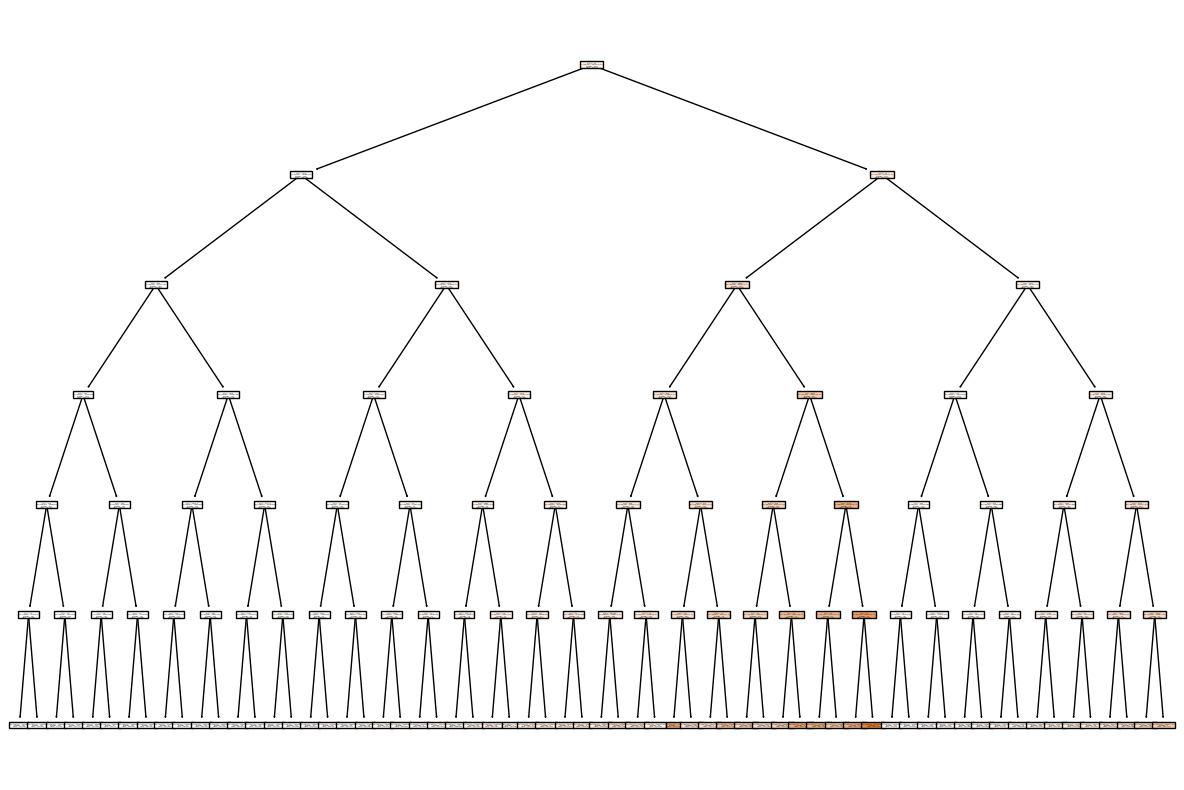

In [194]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtr2,filled=True)

# Random Forest Regressor

In [195]:
rf2=RandomForestRegressor(n_estimators=1000,random_state=1,max_depth=6)

In [196]:
rf2.fit(X_train, Y_train)
print("Random Forest Regressor : {:.2f}%".format(rf2.score(X_test,Y_test)*100))

Random Forest Regressor : 69.06%


In [197]:
y_pred11=rf2.predict(X_test)

In [198]:
print(sqrt(mean_squared_error(Y_test,y_pred11)))

3674.54221209146


# Bagging

In [199]:
bgr2=BaggingRegressor(n_estimators=23)

In [200]:
bgr2.fit(X_train, Y_train)

BaggingRegressor(n_estimators=23)

In [201]:
print(bgr2.score(X_train,Y_train))
print(bgr2.score(X_test,Y_test))

0.9496223106651658
0.7037954234135524


In [202]:
print("Bagging Regressor : {:.2f}%".format(bgr2.score(X_test,Y_test)*100))

Bagging Regressor : 70.38%


In [203]:
y_pred12=bgr2.predict(X_test)

In [204]:
print(sqrt(mean_squared_error(Y_test,y_pred12)))

3595.328114407123


Here model is overfitted

# XG-Boost

In [205]:
xgbr2=xgboost.XGBRFRegressor()

In [206]:
xgbr2.fit(X_train, Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [207]:
print(xgbr2.score(X_train,Y_train))
print(xgbr2.score(X_test,Y_test))

0.7380546425529884
0.694558663488409


In [208]:
print("Boosting Regressor : {:.2f}%".format(xgbr2.score(X_test,Y_test)*100))

Boosting Regressor : 69.46%


In [209]:
y_pred13=xgbr2.predict(X_test)

In [210]:
print(sqrt(mean_squared_error(Y_test,y_pred13)))

3650.955624050291


# Adaboost

In [211]:
abr2=AdaBoostRegressor()

In [212]:
abr2.fit(X_train, Y_train)

AdaBoostRegressor()

In [213]:
print(abr2.score(X_train, Y_train))
print(abr2.score(X_test,Y_test))

0.420105454398607
0.36260815776036104


In [214]:
print("Adaboost Regressor : {:.2f}%".format(abr2.score(X_test,Y_test)*100))

Adaboost Regressor : 36.26%


In [215]:
y_pred14=abr2.predict(X_test)

In [216]:
print(sqrt(mean_squared_error(Y_test,y_pred14)))

5274.07011342935


# Gradient Boost

In [217]:
gbr2=GradientBoostingRegressor()

In [218]:
gbr2.fit(X_train, Y_train)

GradientBoostingRegressor()

In [219]:
print(gbr2.score(X_train, Y_train))
print(gbr2.score(X_test,Y_test))

0.7369601378817796
0.6788576758930454


In [220]:
print("Gradient boost Regressor : {:.2f}%".format(gbr2.score(X_test,Y_test)*100))

Gradient boost Regressor : 67.89%


In [221]:
y_pred15=gbr2.predict(X_test)

In [222]:
print(sqrt(mean_squared_error(Y_test,y_pred15)))

3743.6170936075364
